In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sklearn

In [2]:
file=pd.read_csv('Boston_housing.data',delim_whitespace=True,header=None)
file

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
file.shape

(506, 14)

In [4]:
file.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
col_name=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [6]:
file.columns=col_name

In [7]:
file.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
file.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


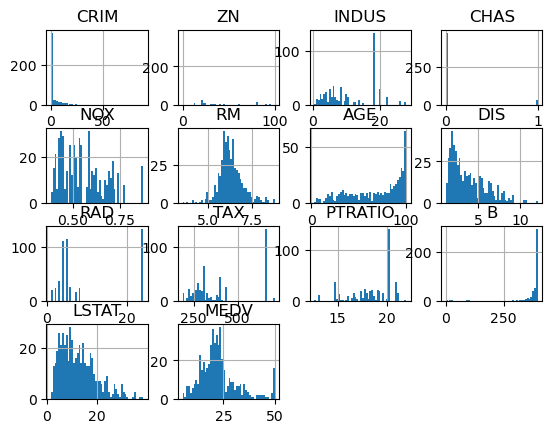

In [10]:
import matplotlib.pyplot as plt
file.hist(bins=50)
plt.show()

In [11]:
file.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## linear regression with sci-kit learn

In [12]:
x=file['RM'].values.reshape(-1,1)

In [13]:
y=file['MEDV'].values

### Import model

In [14]:
from sklearn.linear_model import LinearRegression

### Instantiate model

In [15]:
model=LinearRegression()

In [16]:
model.fit(x,y)

LinearRegression()

In [17]:
model.coef_ #slope of the line

array([9.10210898])

In [18]:
model.intercept_ #c value

-34.67062077643857

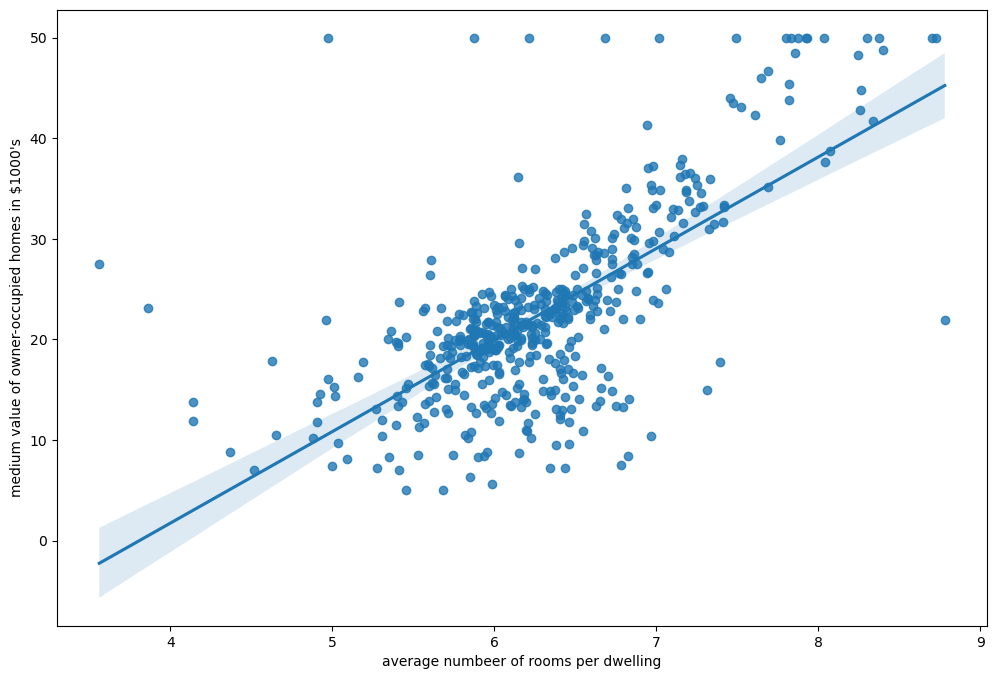

In [19]:
#visualizing best fit line
import seaborn as sns
plt.figure(figsize=(12,8));
sns.regplot(x=x,y=y);
plt.xlabel('average numbeer of rooms per dwelling')
plt.ylabel("medium value of owner-occupied homes in $1000's")
plt.show();

In [20]:
model.predict(np.array([9]).reshape(1,-1))

array([47.24836005])

### LSTAT VS MEDV

In [21]:
x=file['LSTAT'].values.reshape(-1,1)

In [22]:
y=file['MEDV'].values

In [23]:
model=LinearRegression()

In [24]:
model.fit(x,y)

LinearRegression()

In [25]:
model.coef_

array([-0.95004935])

In [26]:
model.intercept_

34.55384087938311

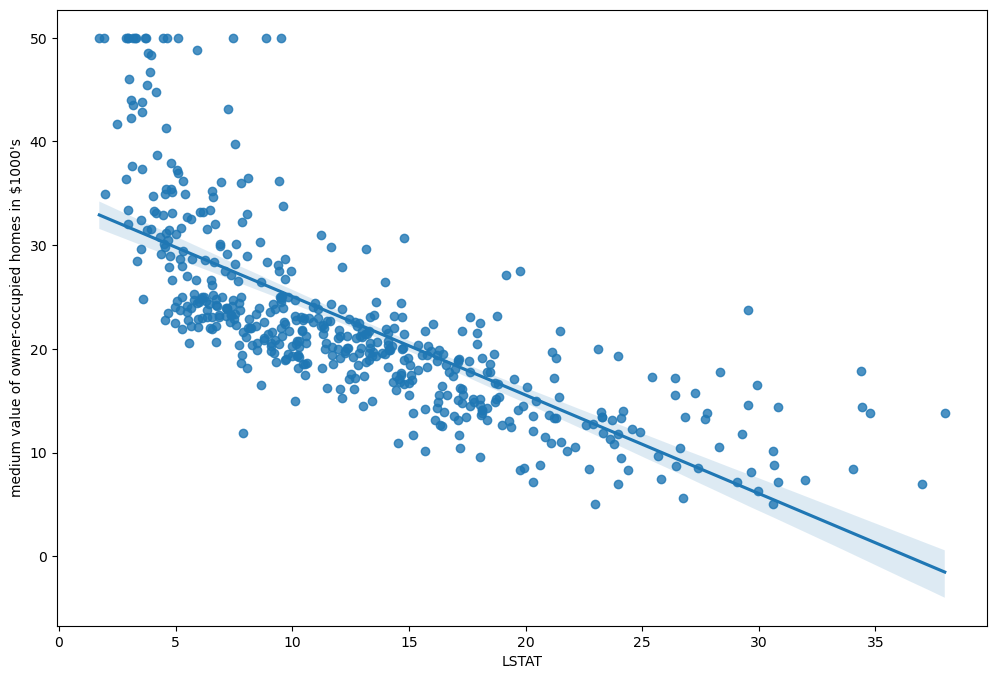

In [27]:
#visualizing best fit line
import seaborn as sns
plt.figure(figsize=(12,8));
sns.regplot(x=x,y=y);
plt.xlabel('LSTAT')
plt.ylabel("medium value of owner-occupied homes in $1000's")
plt.show();

In [28]:
#predict
model.predict(np.array([15]).reshape(1,-1))

array([20.30310057])

### prediction (comparing prediction with actual value)

In [29]:
x=file['RM'].values.reshape(-1,1)
y=file['MEDV'].values

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
LR=LinearRegression()

In [34]:
LR.fit(xtrain,ytrain)

LinearRegression()

In [35]:
LR.coef_

array([9.22505308])

In [36]:
LR.intercept_

-35.27560209483997

In [37]:
#Y prediction
Yp=LR.predict(xtest)

### Performance measures Linear Regression
- Mean Squared Error(MSE)

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
mean_squared_error(ytest,Yp)

34.97828640582502

### Coefficient of determination

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(ytest,Yp)

0.4569047606085108

### LSTAT VS MEDV

In [51]:
x=file['LSTAT'].values.reshape(-1,1)
y=file['MEDV'].values

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=40)

In [53]:
LR2=LinearRegression()

In [54]:
LR2.fit(xtrain,ytrain)

LinearRegression()

In [55]:
LR2.coef_

array([-0.996635])

In [56]:
LR2.intercept_

34.77184066518916

In [57]:
Ypred=LR2.predict(xtest)

In [58]:
mean_squared_error(ytest,Ypred)

54.60661789935337

In [59]:
r2_score(ytest,Ypred)

0.5185746141437989

### Assumption of regression analysis
- 5 basic assumption:
1. Linear Relationship between the features and target
2. Little or no multicollinearity between the features : pairplots and heatmaps(correlation matrix) can be used for identifying highly correlated features.
3. no or low heteroscedaticity
4. Normal distribution of error term
5. little or No autocorrelation in the residual

### Variance Inflation Factor(VIF)
- VIF is directly proportional to r-square value. More the r-square value more will the VIF
- 0-1: No mulicollinearity
- 1-5: Moderate multicollinearity
- VIF >5 : Highly multicollinearity
  > **1/1-R^2**
- r-squared value gives the goodness of best fit line and values ranges from 0-1
- adjusted r-squared value also gives you goodness of best fit line considering whether r-square is using all the useful columns or not. Lesser the adjusted r-squared value better will prediction(goodness of best fit line)

- error term should not explain other error term behavoiur,when plotted scatter plot of error term they should show random spread instead showing any pattern

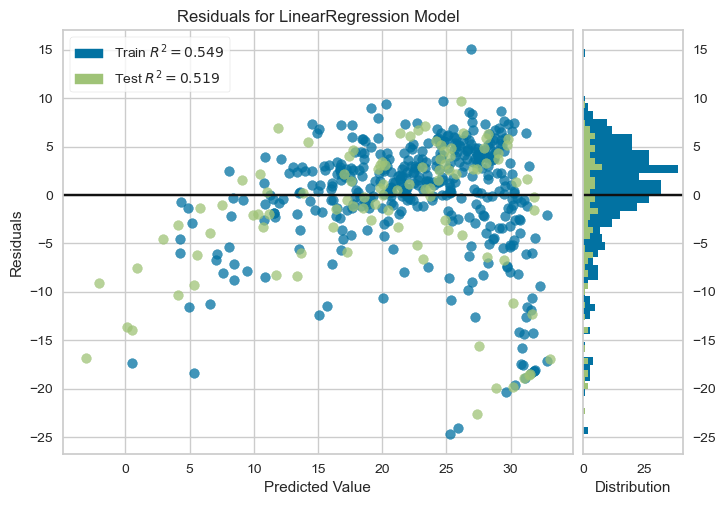

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [61]:
#!pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plot_visuals=ResidualsPlot(LR2)
plot_visuals.fit(xtrain,ytrain)
plot_visuals.score(xtest,ytest)
plt.legend(loc='upper left')
plot_visuals.show()

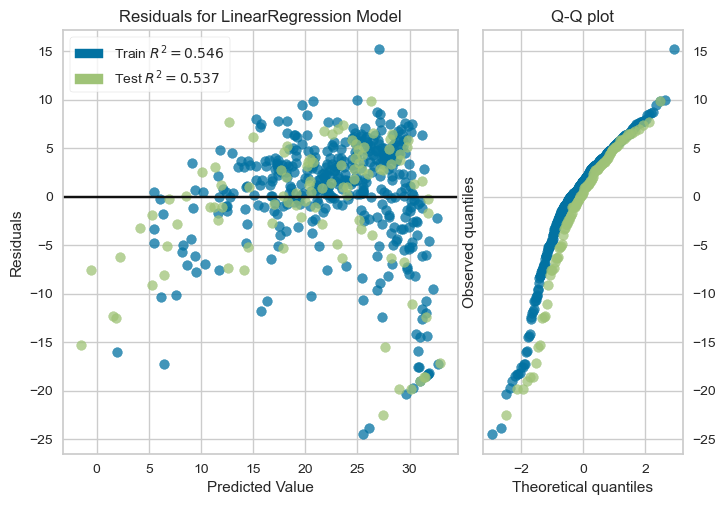

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [62]:
#Normal distribution of the residual can be validated by plotting a q-q plot
plot_visuals = ResidualsPlot(model,hist=False,qqplot=True)
plot_visuals.fit(xtrain,ytrain)
plot_visuals.score(xtest,ytest)
plot_visuals.show()

In [63]:
#LSTAT vs Medv
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE = mean_absolute_error(ytest,Ypred)
MSE= mean_squared_error(ytest,Ypred)
r2 =r2_score(ytest,Ypred)
RMSE = rmse(ytest,Ypred)
print('MAE=',MAE,'\nMSE =',MSE,'\nRMSE=',RMSE,'\nr2=',r2)

MAE= 5.344090638276923 
MSE = 54.60661789935337 
RMSE= 7.389629077250993 
r2= 0.5185746141437989


In [64]:
#RM vs MEDV
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
MAE = mean_absolute_error(ytest,Yp)
MSE= mean_squared_error(ytest,Yp)
r2 =r2_score(ytest,Yp)
RMSE = rmse(ytest,Yp)
print('MAE=',MAE,'\nMSE =',MSE,'\nRMSE=',RMSE,'\nr2=',r2)

MAE= 8.988650465295748 
MSE = 149.5203972201785 
RMSE= 12.227853336550062 
r2= -0.31820862917696435
